In [1]:
# The dataset is uploaded on Google Drive so we need to import the drive utility library

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# import pandas
import pandas as pd

# read the dataset from the SAS file
NHAMCS_2017 = pd.read_sas(filepath_or_buffer = '/content/drive/Shared drives/Vodafone Internship/Dataset/ed2017_sas.sas7bdat')
NHAMCS_2016 = pd.read_sas(filepath_or_buffer = '/content/drive/Shared drives/Vodafone Internship/Dataset/ed2016_sas.sas7bdat')
# inspect the first few records
print(NHAMCS_2017.head())
print(NHAMCS_2016.head())
# look at the dimensions of the dataframe

print(NHAMCS_2017.shape)

print(NHAMCS_2016.shape)




   VMONTH  VDAYR  ARRTIME  WAITTIME  ...     CSTRATM  CPSUM       PATWT      EDWT
0     6.0    6.0  b'2056'      72.0  ...  40100000.0    4.0  3723.12641  21.58043
1     6.0    2.0  b'1417'      64.0  ...  40100000.0    4.0  3723.12641       NaN
2     6.0    2.0  b'2303'      -7.0  ...  40100000.0    4.0  3723.12641       NaN
3     6.0    5.0  b'0930'      29.0  ...  40100000.0    4.0  3723.12641       NaN
4     6.0    2.0  b'1332'      20.0  ...  40100000.0    4.0  3723.12641       NaN

[5 rows x 949 columns]
   VMONTH  VDAYR  ARRTIME  WAITTIME  ...     CSTRATM  CPSUM       PATWT      EDWT
0    11.0    6.0  b'2043'      18.0  ...  40300000.0   33.0  2480.42724  28.82586
1    11.0    3.0  b'2022'      38.0  ...  40300000.0   33.0  2480.42724       NaN
2    11.0    4.0  b'0718'      31.0  ...  40300000.0   33.0  2480.42724       NaN
3    11.0    7.0  b'1427'      32.0  ...  40300000.0   33.0  2480.42724       NaN
4    11.0    4.0  b'1828'      21.0  ...  40300000.0   33.0  2480.42724   

In [157]:
NHAMCS = NHAMCS_2016.append(NHAMCS_2017, sort=False)

print(NHAMCS.head())
print(NHAMCS.shape)
print(NHAMCS.columns)

   VMONTH  VDAYR  ARRTIME  WAITTIME  ...  BLANK1  BLANK2  BLANK3  BLANK4
0    11.0    6.0  b'2043'      18.0  ...     NaN     NaN     NaN     NaN
1    11.0    3.0  b'2022'      38.0  ...     NaN     NaN     NaN     NaN
2    11.0    4.0  b'0718'      31.0  ...     NaN     NaN     NaN     NaN
3    11.0    7.0  b'1427'      32.0  ...     NaN     NaN     NaN     NaN
4    11.0    4.0  b'1828'      21.0  ...     NaN     NaN     NaN     NaN

[5 rows x 953 columns]
(36176, 953)
Index(['VMONTH', 'VDAYR', 'ARRTIME', 'WAITTIME', 'LOV', 'AGE', 'AGER',
       'AGEDAYS', 'RESIDNCE', 'SEX',
       ...
       'SETTYPE', 'YEAR', 'CSTRATM', 'CPSUM', 'PATWT', 'EDWT', 'BLANK1',
       'BLANK2', 'BLANK3', 'BLANK4'],
      dtype='object', length=953)


In [158]:
NHAMCS = NHAMCS.dropna(axis = 1)
print(NHAMCS.head())
print(NHAMCS.shape)

   VMONTH  VDAYR  ARRTIME  WAITTIME  ...    YEAR     CSTRATM  CPSUM       PATWT
0    11.0    6.0  b'2043'      18.0  ...  2016.0  40300000.0   33.0  2480.42724
1    11.0    3.0  b'2022'      38.0  ...  2016.0  40300000.0   33.0  2480.42724
2    11.0    4.0  b'0718'      31.0  ...  2016.0  40300000.0   33.0  2480.42724
3    11.0    7.0  b'1427'      32.0  ...  2016.0  40300000.0   33.0  2480.42724
4    11.0    4.0  b'1828'      21.0  ...  2016.0  40300000.0   33.0  2480.42724

[5 rows x 344 columns]
(36176, 344)


In [159]:
# consider data leakage:
data_leakage_cols = ['DIEDED', 'ADMITHOS',  'ADMIT',  'HDSTAT', 'ADISP'] 
NHAMCS = NHAMCS.drop(data_leakage_cols, axis=1)

# consider closely correlated columns and leave only 1 of them
redundant_cols = ['AGER', 'NOCHRON']
NHAMCS = NHAMCS.drop(redundant_cols, axis=1)



In [160]:
# check the different data types and the number of columns of each
print(NHAMCS.dtypes.value_counts())

float64    293
object      44
dtype: int64


In [161]:
# select the non-integer types in order to be encoded by the LabelEncoder

objectType = NHAMCS.select_dtypes('object')
print(objectType.head())

objectTypeColumnNames = objectType.columns

   ARRTIME   CAUSE1   CAUSE2 CAUSE3  ... HDDIAG2 HDDIAG3 HDDIAG4 HDDIAG5
0  b'2043'    b'-9'    b'-9'  b'-9'  ...   b'-7'   b'-7'   b'-7'   b'-7'
1  b'2022'  b'V892'  b'Y924'  b'-9'  ...   b'-7'   b'-7'   b'-7'   b'-7'
2  b'0718'    b'-9'    b'-9'  b'-9'  ...   b'-7'   b'-7'   b'-7'   b'-7'
3  b'1427'  b'Y080'  b'Y070'  b'-9'  ...   b'-7'   b'-7'   b'-7'   b'-7'
4  b'1828'  b'W178'    b'-9'  b'-9'  ...   b'-7'   b'-7'   b'-7'   b'-7'

[5 rows x 44 columns]


In [162]:
# import the LabelEncoder Class
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# encode each column that had type of 'object' to a numeric equivalent using Label Encoder
for col in objectTypeColumnNames:
  NHAMCS[col] = labelencoder.fit_transform(NHAMCS[col].astype(str))


In [163]:
# Check the different dataypes after using the Label Encoder
print(NHAMCS.dtypes.value_counts())


float64    293
int64       44
dtype: int64


60.757675504219286% of the values are missing in the 'IMMEDR' feature


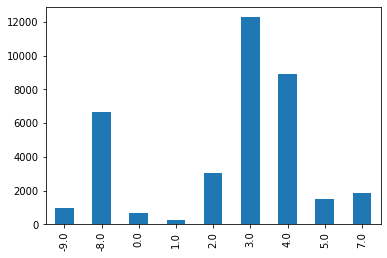

In [164]:
# Firstly, we will look at the percentage of the missing values (or blank) in the 'IMMEDR' column
missingValuesPercentage = (NHAMCS[NHAMCS['IMMEDR']==-9].shape[0] + NHAMCS[NHAMCS['IMMEDR']==-8].shape[0] + NHAMCS[NHAMCS['IMMEDR']==7].shape[0] +NHAMCS[NHAMCS['IMMEDR']==0].shape[0])/16709 *100
print(str(missingValuesPercentage) + "% of the values are missing in the 'IMMEDR' feature" )

# Only 27% is missing and therefore, we will still use it as our target variable

# Observe the different values present in the target label
differentValues = NHAMCS['IMMEDR'].value_counts().sort_index()

differentValues.plot.bar()

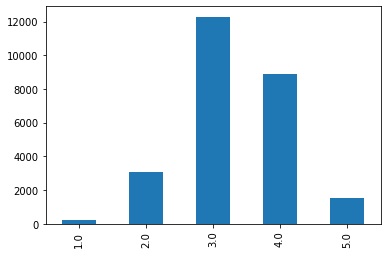

In [165]:
NHAMCS = NHAMCS[NHAMCS.IMMEDR != -9]
NHAMCS = NHAMCS[NHAMCS.IMMEDR != -8]
NHAMCS = NHAMCS[NHAMCS.IMMEDR != 0]
NHAMCS = NHAMCS[NHAMCS.IMMEDR != 7]

immediacyLevel = NHAMCS['IMMEDR']
NHAMCS = NHAMCS.drop(['IMMEDR'], axis=1)


# Observe the different values present in the target label
differentValues = immediacyLevel.value_counts().sort_index()

differentValues.plot.bar()

In [193]:
# The patient ID
patID = NHAMCS[['PATCODE']]

# Demoggraphics of the patient
demographics = NHAMCS[['AGE', 'AGEDAYS', 'SEX', 'PATWT']]

# Data related to the ER visit
visit = NHAMCS[['WAITTIME', 'PAINSCALE', 'SEEN72', 'TOTDIAG']]

# The causes recorded for the patient's situation
causes = NHAMCS[['CAUSE1', 'CAUSE2', 'CAUSE3']]

# The proposed diagnoses for the patient as well as how probably each of them is
diagnoses = NHAMCS[['DIAG1', 'DIAG2', 'DIAG3', 'DIAG4']]
diagnosesProbable = NHAMCS[['PRDIAG1', 'PRDIAG2', 'PRDIAG3', 'PRDIAG4']]

# The complaints recorded by the patient in their previous visits
patientComplaintsDetailed = NHAMCS[['RFV1', 'RFV2', 'RFV3', 'RFV4']]
patientComplaintsBroad = NHAMCS[['RFV13D', 'RFV23D', 'RFV33D', 'RFV43D']]

# Data related to the patients injury (if any)
injuryData = NHAMCS[['INJURY', 'INJPOISAD', 'INJURY72', 'INTENT15', 'INJURY_ENC']]

# The patient's vitals
vitals = NHAMCS[['VITALSD', 'TEMPDF', 'PULSED', 'RESPRD', 'BPSYSD', 'BPDIASD']]

# The patient's disease history
previousDiseases = NHAMCS[['ETOHAB' ,'ALZHD','ASTHMA','CANCER','CEBVD','CKD','COPD','CHF','CAD',
                           'DEPRN','DIABTYP1','DIABTYP2','DIABTYP0','ESRD','HPE','EDHIV','HYPLIPID','HTN',
                           'OBESITY' ,'OSA' ,'OSTPRSIS', 'SUBSTAB','TOTCHRON']]

# Blood test results (if any)
blood = NHAMCS[['ABG','BAC','BMP','BNP','BUNCREAT','CARDENZ','CBC','CMP','BLOODCX',
                'TRTCX','URINECX','WOUNDCX','OTHCX','DDIMER','ELECTROL','GLUCOSE','LACTATE','LFT','PTTINR','OTHERBLD','CARDMON',
                'EKG','HIVTEST','FLUTEST','PREGTEST','TOXSCREN','URINE']]

# Imaging results (if any)
imaging = NHAMCS[['ANYIMAGE','XRAY','CATSCAN','CTCONTRAST','CTAB','CTCHEST','CTHEAD','CTOTHER','CTUNK','MRI','MRICONTRAST','ULTRASND','OTHIMAGE']]

# The patient's medicine history
medications = NHAMCS[['MED1','MED2','MED3','MED4','MED5','MED6','MED7','MED8','MED9','MED10',
                      'MED11','MED12','MED13','MED14','MED15','MED16','MED17','MED18','MED19',
                      'MED20','MED21','MED22','MED23','MED24','MED25','MED26','MED27','MED28','MED29','MED30']]

# Any medicine prescribed in the ER 
ERMedications = NHAMCS[['GPMED1','GPMED2','GPMED3','GPMED4','GPMED5','GPMED6','GPMED7','GPMED8','GPMED9','GPMED10',
                        'GPMED11','GPMED12','GPMED13','GPMED14','GPMED15','GPMED16','GPMED17','GPMED18','GPMED19',
                        'GPMED20','GPMED21','GPMED22','GPMED23','GPMED24','GPMED25','GPMED26','GPMED27','GPMED28','GPMED29','GPMED30']]

manually_selected_features = pd.concat([patID, demographics, visit, causes, diagnoses, diagnosesProbable, patientComplaintsDetailed, patientComplaintsBroad, injuryData, 
                        vitals, previousDiseases, blood, imaging, medications, ERMedications], axis=1)

In [194]:
automatically_selected_features = NHAMCS

# Import the SelectKBest Class, as well as the f_classif scoring metric
from sklearn.feature_selection import SelectKBest, f_classif

# create an instance of SelectKBest which will select the best 10 features
selector_automatic = SelectKBest(f_classif, k=100)

# Create a new dataframe with the only top 10 features that would affect our label (immediacyLevel)
X_new_automatic = selector_automatic.fit_transform(automatically_selected_features, immediacyLevel)

# This part extracts the names of the features since the X_new does not contain column names
mask = selector_automatic.get_support() #list of booleans
new_features_automatic = [] # The list of your K best features
feature_names = automatically_selected_features.columns
for bool, feature in zip(mask, feature_names):
  if bool:
    new_features_automatic.append(feature)

# Replace X_new_automatic with itself, along with the names of the columns
X_new_automatic = pd.DataFrame(X_new_automatic, columns=new_features_automatic)

# print the first 5 records of X_new_automatic to inspect it
print(X_new_automatic.head())

    AGE  AMBTRANSFER  PAYMCARE  PAYMCAID  ...  KIOSELCHK  EDPTOR  DASHBORD  RFID
0  55.0         -7.0       0.0       0.0  ...        2.0     2.0       1.0   2.0
1  69.0         -7.0       0.0       0.0  ...        2.0     2.0       1.0   2.0
2  52.0         -7.0       0.0       0.0  ...        2.0     2.0       1.0   2.0
3  33.0         -7.0       0.0       0.0  ...        2.0     2.0       1.0   2.0
4  21.0         -7.0       0.0       1.0  ...        2.0     2.0       1.0   2.0

[5 rows x 100 columns]


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [331] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [195]:
# create an instance of SelectKBest which will select the best 10 features
selector_manual = SelectKBest(f_classif, k=20)

# Create a new dataframe with the only top 10 features that would affect our label (immediacyLevel)
X_new_manual = selector_manual.fit_transform(manually_selected_features, immediacyLevel)

# This part extracts the names of the features since the X_new does not contain column names
mask = selector_manual.get_support() #list of booleans
new_features_manual = [] # The list of your K best features
feature_names = manually_selected_features.columns
for bool, feature in zip(mask, feature_names):
  if bool:
    new_features_manual.append(feature)

# Replace X_new_manual with itself, along with the names of the columns
X_new_manual = pd.DataFrame(X_new_manual, columns=new_features_manual)

# print the first 5 records of X_new_manual to inspect it
print(X_new_manual.head())

    AGE  TOTDIAG  PULSED  RESPRD  ...  URINE  ANYIMAGE  CATSCAN  CTCONTRAST
0  55.0      2.0    -9.0    -9.0  ...    1.0       0.0      0.0        -9.0
1  69.0      2.0    95.0    20.0  ...    0.0       1.0      1.0         2.0
2  52.0      5.0    98.0    16.0  ...    1.0       1.0      1.0         1.0
3  33.0      4.0    -9.0    -9.0  ...    0.0       0.0      0.0        -9.0
4  21.0      8.0    70.0    18.0  ...    1.0       1.0      1.0         1.0

[5 rows x 20 columns]


In [196]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# These cols were shown to have a minimal effect on the model so they will be removed:
#features_to_be_removed = ['PTTINR', 'BPDIASD', 'PULSED', 'BPSYSD', 'AGE' ]
#features_to_be_removed = ['AGRR', 'ANYIMAGE']

#new_features_automatic = [feat for feat in new_features_automatic if feat not in features_to_be_removed]
print((new_features_automatic))
# Split dataset into training set and test set
X_train_manual, X_test_manual, y_train_manual, y_test_manual = train_test_split(NHAMCS[new_features_manual], immediacyLevel, test_size=0.2, random_state = 5) # 80% training and 20% test
X_train_automatic, X_test_automatic, y_train_automatic, y_test_automatic= train_test_split(NHAMCS[new_features_automatic], immediacyLevel, test_size=0.2, random_state = 5) # 80% training and 20% test

['AGE', 'AMBTRANSFER', 'PAYMCARE', 'PAYMCAID', 'TEMPF', 'BPSYS', 'BPDIAS', 'PAINSCALE', 'RFV1', 'RFV13D', 'INJURY72', 'INTENT15', 'INJURY_ENC', 'CAUSE1', 'CAUSE2', 'DIAG3', 'DIAG4', 'DIAG5', 'PRDIAG2', 'PRDIAG3', 'PRDIAG4', 'PRDIAG5', 'CEBVD', 'CHF', 'CAD', 'DEPRN', 'HYPLIPID', 'HTN', 'TOTCHRON', 'BAC', 'BMP', 'BNP', 'BUNCREAT', 'CARDENZ', 'CBC', 'CMP', 'BLOODCX', 'URINECX', 'GLUCOSE', 'LACTATE', 'PTTINR', 'OTHERBLD', 'CARDMON', 'EKG', 'PREGTEST', 'TOXSCREN', 'URINE', 'ANYIMAGE', 'XRAY', 'CATSCAN', 'CTCONTRAST', 'CTAB', 'CTCHEST', 'CTHEAD', 'ULTRASND', 'TOTDIAG', 'CASTSPLINT', 'CPR', 'ENDOINT', 'IVFLUIDS', 'TOTPROC', 'MED2', 'MED3', 'MED4', 'MED5', 'MED6', 'MED7', 'GPMED3', 'GPMED4', 'GPMED5', 'GPMED6', 'GPMED7', 'NUMGIV', 'NUMMED', 'VITALSD', 'TEMPDF', 'PULSED', 'RESPRD', 'BPSYSD', 'BPDIASD', 'ATTPHYS', 'RESINT', 'CONSULT', 'PHYSASST', 'EMT', 'MHPROV', 'OTHPROV', 'RETREFFU', 'TRANPSYC', 'ADMTPHYS', 'HDDIAG1', 'HDDIAG2', 'ERESULTER', 'ERADIER', 'EIMGRESER', 'INCPHYS', 'KIOSELCHK', 'EDP

In [182]:
print(NHAMCS['PTTINR'].describe())

count    26024.000000
mean         0.092837
std          0.290210
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: PTTINR, dtype: float64


In [138]:
#Import svm model
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

In [123]:
# train the model on train set 
model_manual = svm.SVC(kernel='linear') 
model_manual.fit(X_train_manual, y_train_manual) 
  
# print prediction results 
predictions_manual = model_manual.predict(X_test_manual) 
print(classification_report(y_test_manual, predictions_manual))

KeyboardInterrupt: ignored

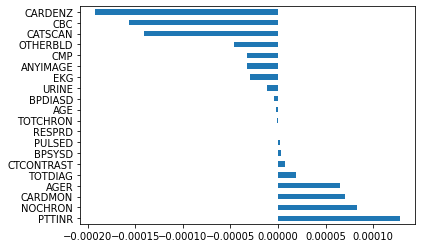

In [70]:
pd.Series((model_manual.coef_[0]), index=X_train_manual.columns).nlargest(20).plot(kind='barh')


In [197]:
from sklearn.linear_model import LogisticRegression
# train the model on train set 
#model_auto = svm.SVC(kernel='linear') 
model_auto = LogisticRegression()
model_auto.fit(X_train_automatic, y_train_automatic) 
  
# print prediction results 
predictions_automatic = model_auto.predict(X_test_automatic) 
print(classification_report(y_test_automatic, predictions_automatic))

              precision    recall  f1-score   support

         1.0       1.00      0.02      0.03        65
         2.0       0.27      0.04      0.08       587
         3.0       0.55      0.73      0.62      2441
         4.0       0.49      0.50      0.49      1819
         5.0       0.00      0.00      0.00       293

    accuracy                           0.52      5205
   macro avg       0.46      0.26      0.24      5205
weighted avg       0.47      0.52      0.47      5205



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5682997118155619


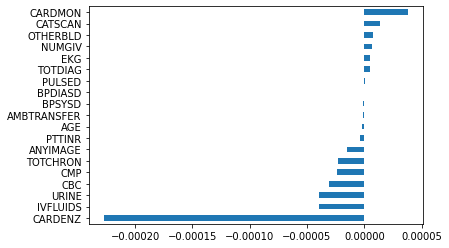

In [185]:
from sklearn.metrics import accuracy_score
score_auto = accuracy_score(y_test_automatic, predictions_automatic)
print(score_auto)


pd.Series((model_auto.coef_[0]), index=X_train_automatic.columns).nsmallest(19).plot(kind='barh')


In [192]:
# test logistic regression on whole dataset

model_full = LogisticRegression()
X_train_full, X_test_full, y_train_full, y_test_full= train_test_split(NHAMCS, immediacyLevel, test_size=0.2, random_state = 5) # 80% training and 20% test
model_full.fit(X_train_full, y_train_full) 

# print prediction results 
predictions_full = model_full.predict(X_test_full) 
print(classification_report(y_test_full, predictions_full))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        65
         2.0       0.00      0.00      0.00       587
         3.0       0.48      0.93      0.63      2441
         4.0       0.42      0.11      0.17      1819
         5.0       0.00      0.00      0.00       293

    accuracy                           0.47      5205
   macro avg       0.18      0.21      0.16      5205
weighted avg       0.37      0.47      0.36      5205



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


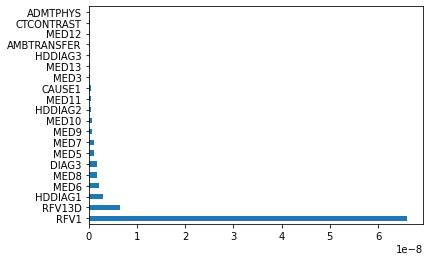

In [191]:
pd.Series((model_full.coef_[0]), index=NHAMCS.columns).nlargest(20).plot(kind='barh')


In [202]:
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV 

kbest = SelectKBest(f_classif) 
pipeline = Pipeline([('kbest', kbest), ('svm', svm.SVC())]) 
grid_search = GridSearchCV(pipeline, {'kbest__k': [5,10,20,30]}) 

X_train_full, X_test_full, y_train_full, y_test_full= train_test_split(NHAMCS, immediacyLevel, test_size=0.2, random_state = 5) # 80% training and 20% test


grid_search.fit(X_train_full, y_train_full) 

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [331] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [331] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [331] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.6/dist-packages/s

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kbest',
                                        SelectKBest(k=10,
                                                    score_func=<function f_classif at 0x7f49fe144488>)),
                                       ('svm',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                        

In [203]:
print(grid_search.best_score_)

0.572265807166791
